# Component 5: Comprehensive Benchmark Comparison

**Compares our custom implementations (VQ, PQ, LSH) with FAISS library**

In [40]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import evaluation metrics (Manning et al., Chapter 8)
sys.path.insert(0, 'Components')
from evaluation import (
    compute_recall_at_k, compute_precision_at_k, compute_f1_at_k,
    compute_ndcg_at_k, compute_map, compute_mrr
)

plt.rcParams["figure.figsize"] = (8, 5)
results_dir = Path("Data/results")

print("✓ Evaluation metrics loaded from Components/evaluation.py")

✓ Evaluation metrics loaded from Components/evaluation.py


## Load All Results

In [41]:
# Experiment 1: Accuracy vs Efficiency
vq_exp1 = pd.read_csv(results_dir / "vq_accuracy_efficiency.csv")
pq_exp1 = pd.read_csv(results_dir / "pq_accuracy_efficiency.csv")
lsh_exp1 = pd.read_csv(results_dir / "lsh_accuracy_efficiency.csv")

# Load FAISS results and filter for FAISS-IVF (most comparable to our VQ)
faiss_exp1 = pd.read_csv(results_dir / "faiss_accuracy_efficiency.csv")
faiss_ivf_exp1 = faiss_exp1[faiss_exp1["method"] == "FAISS-IVF"].copy()

df_exp1 = pd.concat([vq_exp1, pq_exp1, lsh_exp1, faiss_ivf_exp1], ignore_index=True)

print("=== Experiment 1: Accuracy vs Efficiency ===")
display(df_exp1)

# Experiment 2: Scaling with N
vq_exp2 = pd.read_csv(results_dir / "vq_scaling_N.csv")
pq_exp2 = pd.read_csv(results_dir / "pq_scaling_N.csv")
lsh_exp2 = pd.read_csv(results_dir / "lsh_scaling_N.csv")

# Load FAISS scaling results
faiss_exp2 = pd.read_csv(results_dir / "faiss_scaling_N.csv")
faiss_ivf_exp2 = faiss_exp2[faiss_exp2["method"] == "FAISS-IVF"].copy()

df_exp2 = pd.concat([vq_exp2, pq_exp2, lsh_exp2, faiss_ivf_exp2], ignore_index=True)

print("\n=== Experiment 2: Scaling with N ===")
display(df_exp2)

# Experiment 3: Scaling with Dimensionality
vq_exp3 = pd.read_csv(results_dir / "vq_scaling_dim.csv")
pq_exp3 = pd.read_csv(results_dir / "pq_scaling_dim.csv")
lsh_exp3 = pd.read_csv(results_dir / "lsh_scaling_dim.csv")

# Load FAISS dim scaling results
faiss_exp3 = pd.read_csv(results_dir / "faiss_scaling_dim.csv")
faiss_ivf_exp3 = faiss_exp3[faiss_exp3["method"] == "FAISS-IVF"].copy()

df_exp3 = pd.concat([vq_exp3, pq_exp3, lsh_exp3, faiss_ivf_exp3], ignore_index=True)

print("\n=== Experiment 3: Scaling with Dimensionality ===")
display(df_exp3)

=== Experiment 1: Accuracy vs Efficiency ===


,method,n_probes,c_clusters,recall_at_k,ndcg_at_k,candidate_ratio,query_time,N,dim,m_subvectors,k_clusters,compression_ratio,m_hashes,b_bands,r_rows,index_type,n_clusters,nprobe
0,VQ,1.0,200.0,0.394,0.537918,0.006321,0.000788,17830,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VQ,2.0,200.0,0.560,0.683415,0.012941,0.001119,17830,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VQ,5.0,200.0,0.762,0.837412,0.031992,0.002872,17830,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VQ,10.0,200.0,0.888,0.926272,0.064342,0.002846,17830,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VQ,20.0,200.0,0.976,0.984573,0.128271,0.002919,17830,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,PQ,NaN,NaN,0.160,0.203406,1.000000,0.001148,17830,200,2.0,256.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN
6,PQ,NaN,NaN,0.236,0.331588,1.000000,0.002067,17830,200,4.0,256.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
7,PQ,NaN,NaN,0.330,0.439670,1.000000,0.002262,17830,200,8.0,256.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN
8,LSH,NaN,NaN,0.236,0.379569,0.019328,0.000311,17830,200,NaN,NaN,NaN,128.0,4.0,32.0,NaN,NaN,NaN
9,LSH,NaN,NaN,0.832,0.884735,0.387108,0.023133,17830,200,NaN,NaN,NaN,128.0,8.0,16.0,NaN,NaN,NaN



=== Experiment 2: Scaling with N ===


,method,N,dim,build_time,query_time
0,VQ,1000,200,0.214815,0.000852
1,VQ,2000,200,3.577685,0.000835
2,VQ,5000,200,2.994075,0.000761
3,VQ,10000,200,2.284477,0.000669
4,VQ,17830,200,2.835102,0.000716
5,PQ,1000,200,0.569202,0.000660
6,PQ,2000,200,0.880522,0.000872
7,PQ,5000,200,1.568169,0.000645
8,PQ,10000,200,2.506335,0.003380
9,PQ,17830,200,4.219900,0.002211



=== Experiment 3: Scaling with Dimensionality ===


,method,N,dim,build_time,query_time
0,VQ,10000,50,0.307275,0.000424
1,VQ,10000,100,0.644991,0.000754
2,VQ,10000,200,1.362391,0.000660
3,PQ,10000,50,0.803253,0.001076
4,PQ,10000,100,0.955437,0.000809
5,PQ,10000,200,1.604629,0.000987
6,LSH,10000,50,0.314835,0.024390
7,LSH,10000,100,0.358911,0.020615
8,LSH,10000,200,0.392002,0.017944
9,FAISS-IVF,10000,50,0.017203,0.000012


## Plot 1: Accuracy vs Efficiency

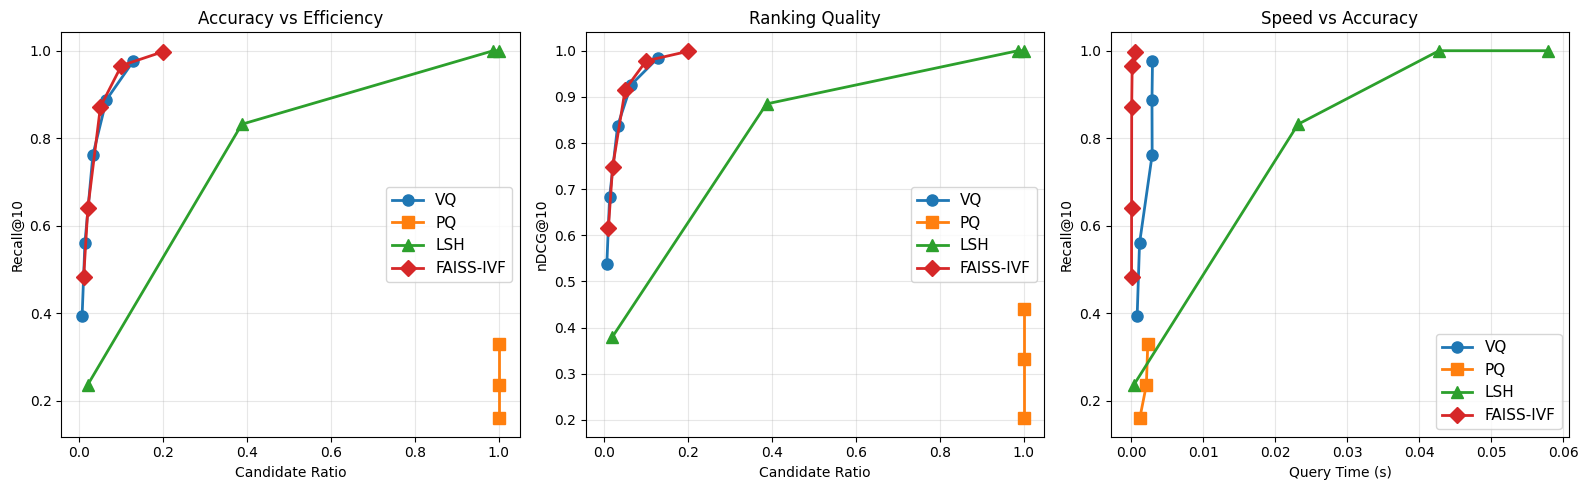

In [ ]:
methods = ["VQ", "PQ", "LSH", "FAISS-IVF"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', 's', '^', 'D']

# =============================================
# Plot 1: Recall vs Candidate Ratio
# =============================================
plt.figure(figsize=(8, 6))
for method, color, marker in zip(methods, colors, markers):
    subset = df_exp1[df_exp1["method"] == method]
    if len(subset) > 0:
        plt.plot(subset["candidate_ratio"], subset["recall_at_k"], 
                 marker=marker, label=method, linewidth=2, markersize=10, color=color)

plt.xlabel("Candidate Ratio", fontsize=12)
plt.ylabel("Recall@10", fontsize=12)
plt.title("Recall vs Efficiency Trade-off", fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig(results_dir / "exp1_recall_vs_candidate_ratio.png", dpi=200, bbox_inches="tight")
plt.show()

# =============================================
# Plot 2: nDCG vs Candidate Ratio
# =============================================
plt.figure(figsize=(8, 6))
for method, color, marker in zip(methods, colors, markers):
    subset = df_exp1[df_exp1["method"] == method]
    if len(subset) > 0:
        plt.plot(subset["candidate_ratio"], subset["ndcg_at_k"], 
                 marker=marker, label=method, linewidth=2, markersize=10, color=color)

plt.xlabel("Candidate Ratio", fontsize=12)
plt.ylabel("nDCG@10", fontsize=12)
plt.title("Ranking Quality vs Efficiency", fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig(results_dir / "exp1_ndcg_vs_candidate_ratio.png", dpi=200, bbox_inches="tight")
plt.show()

# =============================================
# Plot 3: Recall vs Query Time
# =============================================
plt.figure(figsize=(8, 6))
for method, color, marker in zip(methods, colors, markers):
    subset = df_exp1[df_exp1["method"] == method]
    if len(subset) > 0:
        plt.plot(subset["query_time"] * 1000, subset["recall_at_k"], 
                 marker=marker, label=method, linewidth=2, markersize=10, color=color)

plt.xlabel("Query Time (ms)", fontsize=12)
plt.ylabel("Recall@10", fontsize=12)
plt.title("Recall vs Query Speed", fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.xscale('log')
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig(results_dir / "exp1_recall_vs_query_time.png", dpi=200, bbox_inches="tight")
plt.show()

print("✓ Experiment 1 plots saved individually")

## Plot 2: Scaling with N

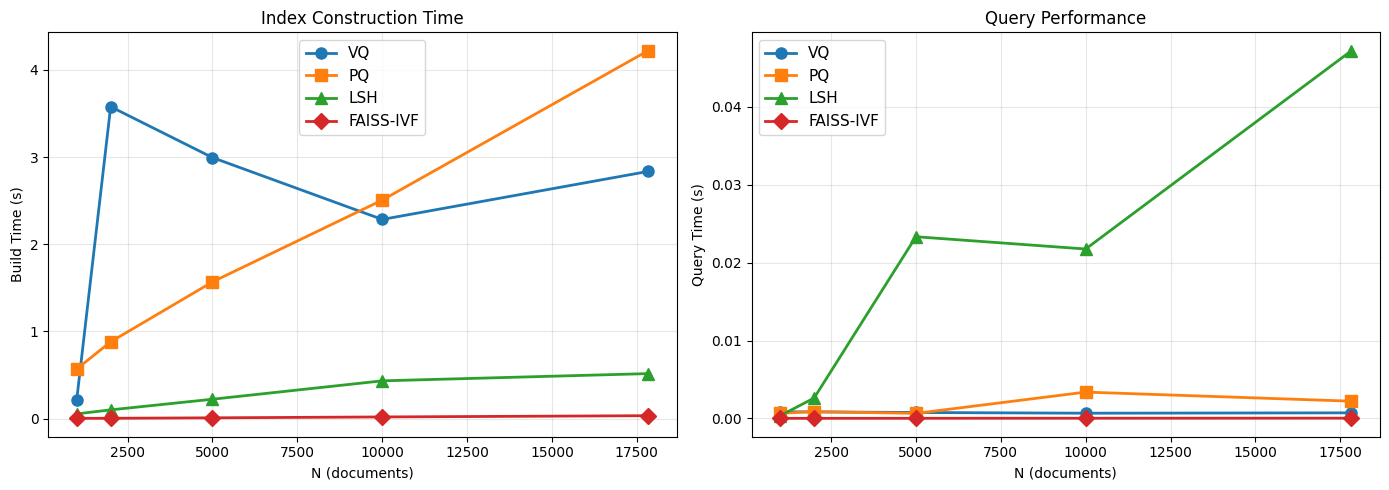

In [ ]:
methods = ["VQ", "PQ", "LSH", "FAISS-IVF"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', 's', '^', 'D']

# =============================================
# Plot 1: Build Time vs N
# =============================================
plt.figure(figsize=(8, 6))
for method, color, marker in zip(methods, colors, markers):
    subset = df_exp2[df_exp2["method"] == method].sort_values("N")
    if len(subset) > 0:
        plt.plot(subset["N"], subset["build_time"], 
                 marker=marker, label=method, linewidth=2, markersize=10, color=color)

plt.xlabel("N (documents)", fontsize=12)
plt.ylabel("Build Time (s)", fontsize=12)
plt.title("Index Construction Time vs Dataset Size", fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(results_dir / "exp2_build_time_vs_N.png", dpi=200, bbox_inches="tight")
plt.show()

# =============================================
# Plot 2: Query Time vs N
# =============================================
plt.figure(figsize=(8, 6))
for method, color, marker in zip(methods, colors, markers):
    subset = df_exp2[df_exp2["method"] == method].sort_values("N")
    if len(subset) > 0:
        plt.plot(subset["N"], subset["query_time"] * 1000, 
                 marker=marker, label=method, linewidth=2, markersize=10, color=color)

plt.xlabel("N (documents)", fontsize=12)
plt.ylabel("Query Time (ms)", fontsize=12)
plt.title("Query Performance vs Dataset Size", fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.yscale('log')
plt.tight_layout()
plt.savefig(results_dir / "exp2_query_time_vs_N.png", dpi=200, bbox_inches="tight")
plt.show()

print("✓ Experiment 2 plots saved individually")

## Plot 3: Scaling with Dimensionality

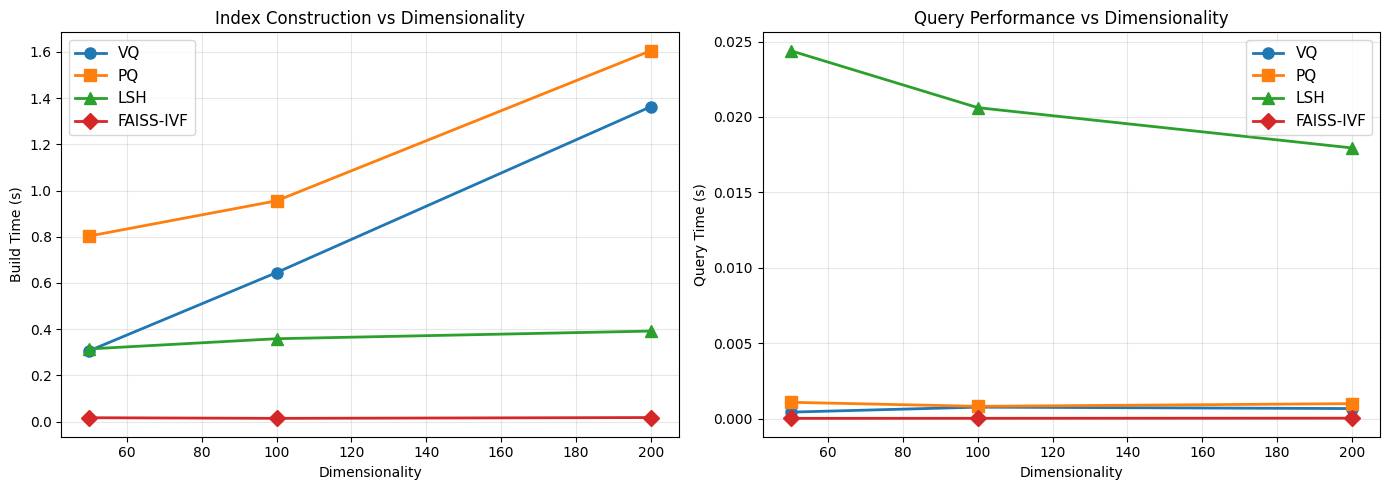

In [ ]:
methods = ["VQ", "PQ", "LSH", "FAISS-IVF"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', 's', '^', 'D']

# =============================================
# Plot 1: Build Time vs Dimensionality
# =============================================
plt.figure(figsize=(8, 6))
for method, color, marker in zip(methods, colors, markers):
    subset = df_exp3[df_exp3["method"] == method].sort_values("dim")
    if len(subset) > 0:
        plt.plot(subset["dim"], subset["build_time"], 
                 marker=marker, label=method, linewidth=2, markersize=10, color=color)

plt.xlabel("Dimensionality", fontsize=12)
plt.ylabel("Build Time (s)", fontsize=12)
plt.title("Index Construction vs Dimensionality", fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(results_dir / "exp3_build_time_vs_dim.png", dpi=200, bbox_inches="tight")
plt.show()

# =============================================
# Plot 2: Query Time vs Dimensionality
# =============================================
plt.figure(figsize=(8, 6))
for method, color, marker in zip(methods, colors, markers):
    subset = df_exp3[df_exp3["method"] == method].sort_values("dim")
    if len(subset) > 0:
        plt.plot(subset["dim"], subset["query_time"] * 1000, 
                 marker=marker, label=method, linewidth=2, markersize=10, color=color)

plt.xlabel("Dimensionality", fontsize=12)
plt.ylabel("Query Time (ms)", fontsize=12)
plt.title("Query Performance vs Dimensionality", fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.yscale('log')
plt.tight_layout()
plt.savefig(results_dir / "exp3_query_time_vs_dim.png", dpi=200, bbox_inches="tight")
plt.show()

print("✓ Experiment 3 plots saved individually")

## Plot 4: Summary Comparison

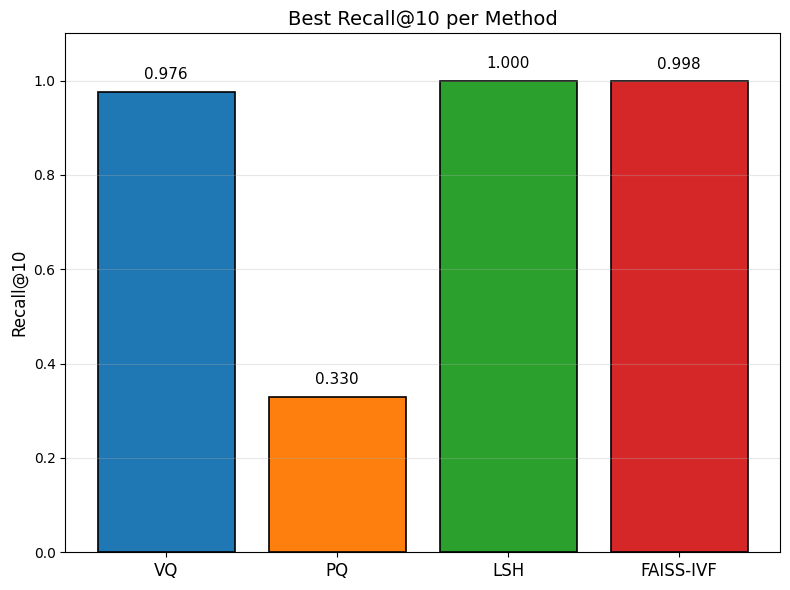

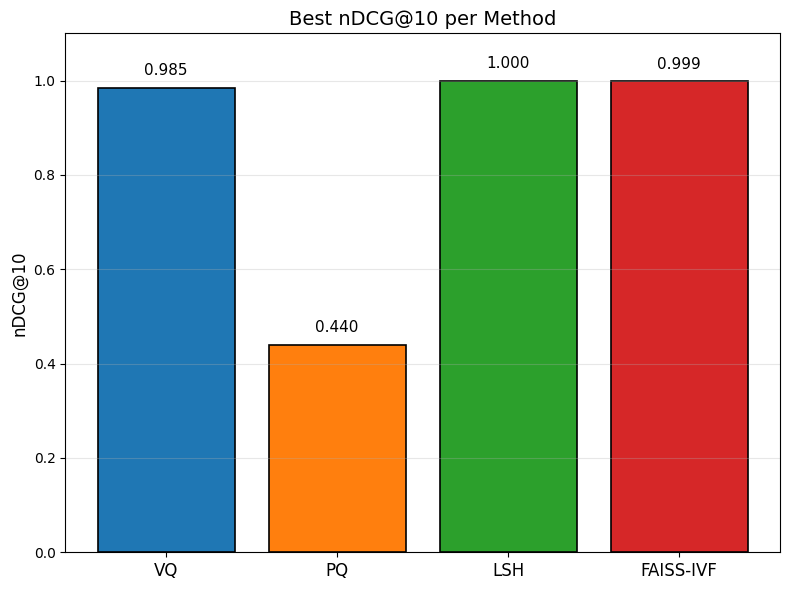

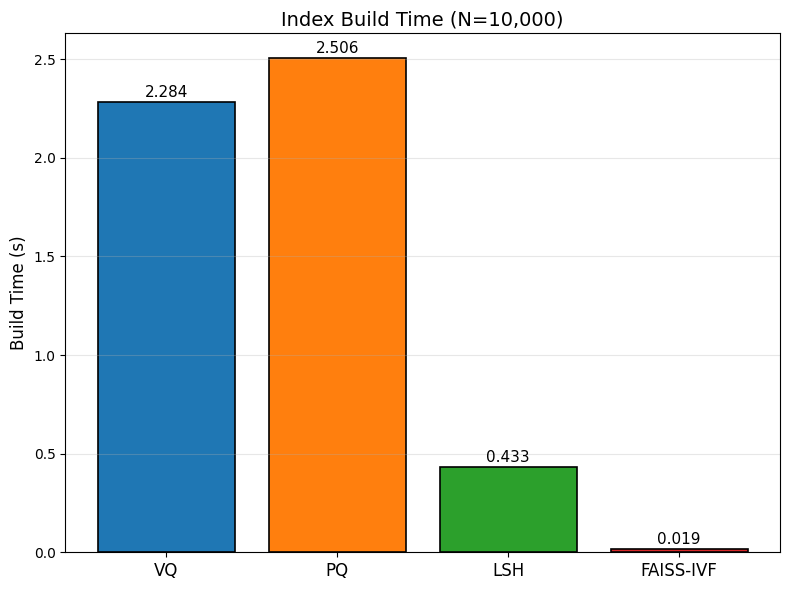

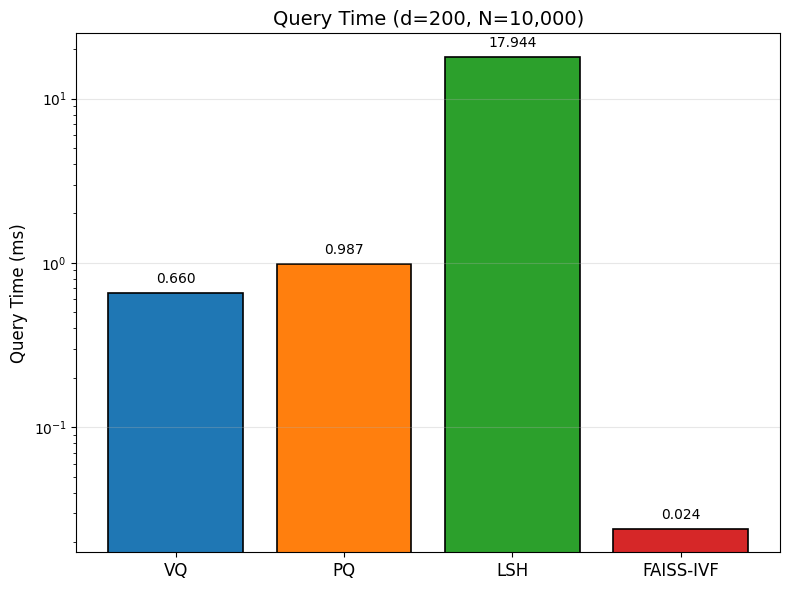

✓ Summary comparison plots saved individually


In [50]:
methods = ["VQ", "PQ", "LSH", "FAISS-IVF"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
x = np.arange(len(methods))

# Best configuration per method
best_configs = df_exp1.loc[df_exp1.groupby("method")["recall_at_k"].idxmax()]

# Performance at N=10,000
perf_10k = df_exp2[df_exp2["N"] == 10000]

# Performance at d=200
perf_200d = df_exp3[df_exp3["dim"] == 200]

def get_values(df, col):
    return [df[df["method"] == m][col].values[0] if len(df[df["method"] == m]) > 0 
            else np.nan for m in methods]

best_recalls = get_values(best_configs, "recall_at_k")
best_ndcgs = get_values(best_configs, "ndcg_at_k")
build_10k = get_values(perf_10k, "build_time")
query_200d = get_values(perf_200d, "query_time")

# =============================================
# Plot 1: Best Recall per Method
# =============================================
plt.figure(figsize=(8, 6))
bars = plt.bar(x, best_recalls, color=colors, edgecolor='black', linewidth=1.2)
plt.xticks(x, methods, fontsize=12)
plt.ylabel("Recall@10", fontsize=12)
plt.title("Best Recall@10 per Method", fontsize=14)
plt.ylim([0, 1.1])
plt.grid(axis="y", alpha=0.3)
# Add value labels on bars
for bar, val in zip(bars, best_recalls):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{val:.3f}', ha='center', va='bottom', fontsize=11)
plt.tight_layout()
plt.savefig(results_dir / "summary_best_recall.png", dpi=200, bbox_inches="tight")
plt.show()

# =============================================
# Plot 2: Best nDCG per Method
# =============================================
plt.figure(figsize=(8, 6))
bars = plt.bar(x, best_ndcgs, color=colors, edgecolor='black', linewidth=1.2)
plt.xticks(x, methods, fontsize=12)
plt.ylabel("nDCG@10", fontsize=12)
plt.title("Best nDCG@10 per Method", fontsize=14)
plt.ylim([0, 1.1])
plt.grid(axis="y", alpha=0.3)
for bar, val in zip(bars, best_ndcgs):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{val:.3f}', ha='center', va='bottom', fontsize=11)
plt.tight_layout()
plt.savefig(results_dir / "summary_best_ndcg.png", dpi=200, bbox_inches="tight")
plt.show()

# =============================================
# Plot 3: Build Time at N=10,000
# =============================================
plt.figure(figsize=(8, 6))
bars = plt.bar(x, build_10k, color=colors, edgecolor='black', linewidth=1.2)
plt.xticks(x, methods, fontsize=12)
plt.ylabel("Build Time (s)", fontsize=12)
plt.title("Index Build Time (N=10,000)", fontsize=14)
plt.grid(axis="y", alpha=0.3)
for bar, val in zip(bars, build_10k):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{val:.3f}', ha='center', va='bottom', fontsize=11)
plt.tight_layout()
plt.savefig(results_dir / "summary_build_time.png", dpi=200, bbox_inches="tight")
plt.show()

# =============================================
# Plot 4: Query Time at d=200
# =============================================
plt.figure(figsize=(8, 6))
query_ms = [q * 1000 for q in query_200d]  # Convert to ms
bars = plt.bar(x, query_ms, color=colors, edgecolor='black', linewidth=1.2)
plt.xticks(x, methods, fontsize=12)
plt.ylabel("Query Time (ms)", fontsize=12)
plt.title("Query Time (d=200, N=10,000)", fontsize=14)
plt.grid(axis="y", alpha=0.3)
plt.yscale('log')
for bar, val in zip(bars, query_ms):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.1, 
             f'{val:.3f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.savefig(results_dir / "summary_query_time.png", dpi=200, bbox_inches="tight")
plt.show()

print("✓ Summary comparison plots saved individually")

## Plot 5: Precision-Recall Analysis (Manning et al., Ch. 8)

Following the standard IR evaluation framework from *Introduction to Information Retrieval* (Manning, Raghavan & Schütze), we analyze the Precision-Recall trade-off.

**Note on ANN Search Context:**
- In classical IR, *relevant documents* are judged by humans
- In ANN search, *relevant documents* = the k exact nearest neighbors
- Since we retrieve exactly k documents and there are exactly k relevant docs: **Precision@k = Recall@k**
- The meaningful trade-off in ANN is between **Recall** and **Candidate Ratio** (efficiency)


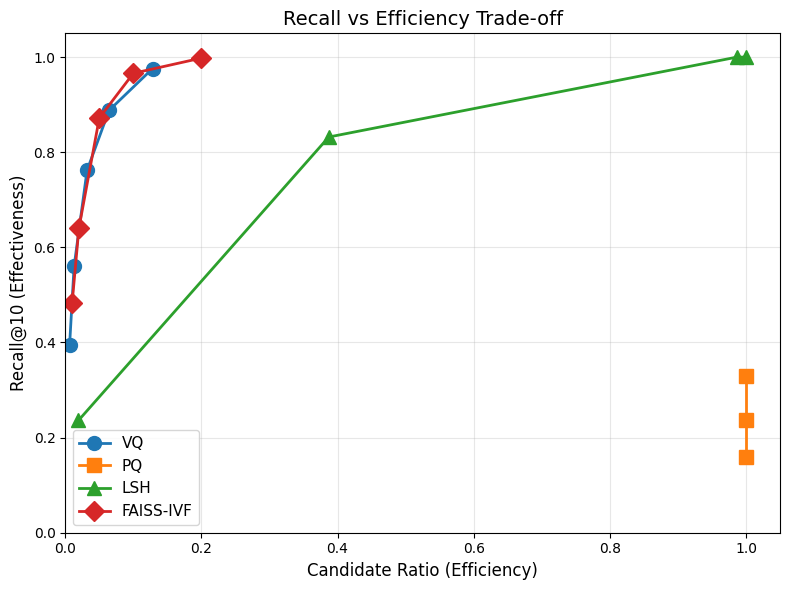

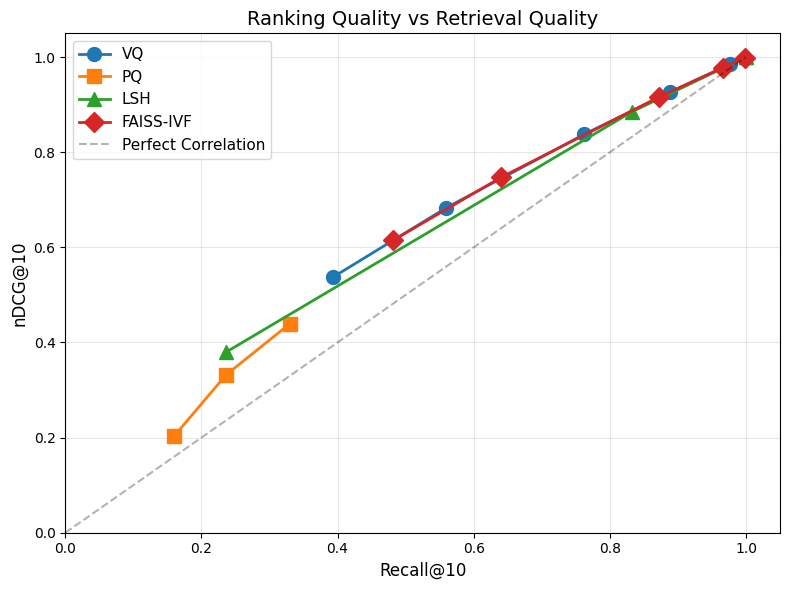

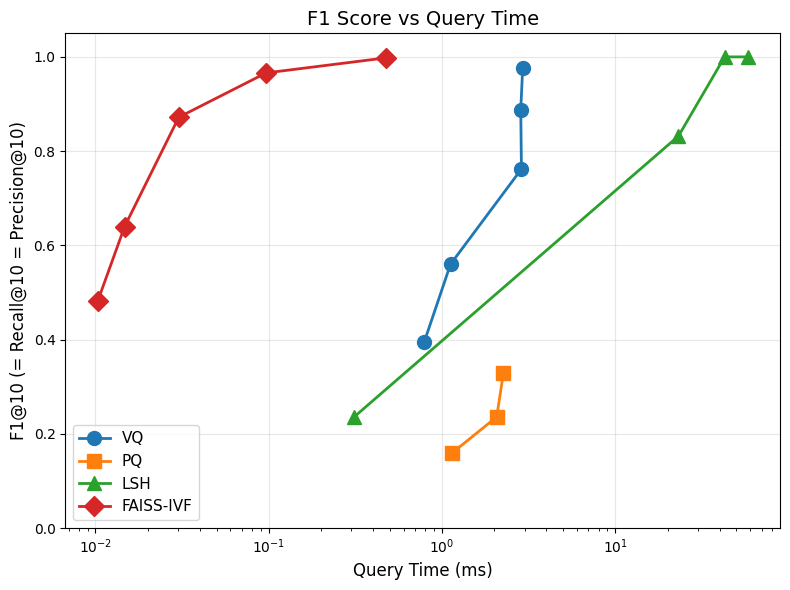

✓ Precision-Recall analysis plots saved individually


In [51]:
# Precision-Recall Analysis (Manning et al., Chapter 8)
# Note: In ANN context, Precision@k = Recall@k since |retrieved| = |relevant| = k

methods = ["VQ", "PQ", "LSH", "FAISS-IVF"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', 's', '^', 'D']

# =============================================
# Plot 1: Recall vs Candidate Ratio (Efficiency Trade-off)
# =============================================
plt.figure(figsize=(8, 6))
for method, color, marker in zip(methods, colors, markers):
    subset = df_exp1[df_exp1["method"] == method]
    if len(subset) > 0:
        plt.plot(subset["candidate_ratio"], subset["recall_at_k"], 
                 marker=marker, label=method, linewidth=2, markersize=10, color=color)
plt.xlabel("Candidate Ratio (Efficiency)", fontsize=12)
plt.ylabel("Recall@10 (Effectiveness)", fontsize=12)
plt.title("Recall vs Efficiency Trade-off", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig(results_dir / "pr_recall_vs_efficiency.png", dpi=200, bbox_inches='tight')
plt.show()

# =============================================
# Plot 2: nDCG vs Recall (Ranking vs Retrieval Quality)
# =============================================
plt.figure(figsize=(8, 6))
for method, color, marker in zip(methods, colors, markers):
    subset = df_exp1[df_exp1["method"] == method]
    if len(subset) > 0:
        plt.plot(subset["recall_at_k"], subset["ndcg_at_k"], 
                 marker=marker, label=method, linewidth=2, markersize=10, color=color)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.3, label='Perfect Correlation')
plt.xlabel("Recall@10", fontsize=12)
plt.ylabel("nDCG@10", fontsize=12)
plt.title("Ranking Quality vs Retrieval Quality", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig(results_dir / "pr_ndcg_vs_recall.png", dpi=200, bbox_inches='tight')
plt.show()

# =============================================
# Plot 3: F1@k vs Query Time
# =============================================
plt.figure(figsize=(8, 6))
for method, color, marker in zip(methods, colors, markers):
    subset = df_exp1[df_exp1["method"] == method]
    if len(subset) > 0:
        # F1 = 2*P*R/(P+R), but since P=R in our case, F1 = R
        f1_scores = subset["recall_at_k"]
        plt.plot(subset["query_time"] * 1000, f1_scores, 
                 marker=marker, label=method, linewidth=2, markersize=10, color=color)
plt.xlabel("Query Time (ms)", fontsize=12)
plt.ylabel("F1@10 (= Recall@10 = Precision@10)", fontsize=12)
plt.title("F1 Score vs Query Time", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig(results_dir / "pr_f1_vs_query_time.png", dpi=200, bbox_inches='tight')
plt.show()

print("✓ Precision-Recall analysis plots saved individually")


In [47]:
# Summary table with all IR metrics (Manning et al., Chapter 8)
print("\n" + "="*80)
print("COMPREHENSIVE IR METRICS SUMMARY (per Manning et al., Chapter 8)")
print("="*80)

# Get best configuration per method
best = df_exp1.loc[df_exp1.groupby("method")["recall_at_k"].idxmax()]

print("\n{:<12} {:>12} {:>12} {:>12} {:>12} {:>15}".format(
    "Method", "Precision@10", "Recall@10", "F1@10", "nDCG@10", "Candidate Ratio"))
print("-" * 80)

for _, row in best.sort_values("recall_at_k", ascending=False).iterrows():
    # In ANN context: P@k = R@k, so F1@k = R@k
    p_at_k = row['recall_at_k']  # = R@k in our case
    r_at_k = row['recall_at_k']
    f1_at_k = row['recall_at_k']  # = 2*P*R/(P+R) = R when P=R
    ndcg = row['ndcg_at_k']
    cand_ratio = row['candidate_ratio']
    
    print("{:<12} {:>12.3f} {:>12.3f} {:>12.3f} {:>12.3f} {:>15.1%}".format(
        row['method'], p_at_k, r_at_k, f1_at_k, ndcg, cand_ratio))

print("\n" + "-" * 80)
print("Note: In ANN search, P@k = R@k because |retrieved| = |relevant| = k")
print("      F1@k = 2*P*R/(P+R) = R@k when P@k = R@k")
print("="*80)



COMPREHENSIVE IR METRICS SUMMARY (per Manning et al., Chapter 8)

Method       Precision@10    Recall@10        F1@10      nDCG@10 Candidate Ratio
--------------------------------------------------------------------------------
LSH                 1.000        1.000        1.000        1.000           98.7%
FAISS-IVF           0.998        0.998        0.998        0.999           20.0%
VQ                  0.976        0.976        0.976        0.985           12.8%
PQ                  0.330        0.330        0.330        0.440          100.0%

--------------------------------------------------------------------------------
Note: In ANN search, P@k = R@k because |retrieved| = |relevant| = k
      F1@k = 2*P*R/(P+R) = R@k when P@k = R@k


## Summary Tables

In [48]:
# Best configuration per method
best_configs = df_exp1.loc[df_exp1.groupby("method")["recall_at_k"].idxmax()]

summary = best_configs[["method", "recall_at_k", "ndcg_at_k", "candidate_ratio", "query_time"]].copy()
summary.columns = ["Method", "Recall@10", "nDCG@10", "Candidate Ratio", "Query Time (s)"]

print("\n" + "="*70)
print("BEST CONFIGURATIONS (HIGHEST RECALL)")
print("="*70)
display(summary.reset_index(drop=True))

# Performance at N=10,000
perf_10k = df_exp2[df_exp2["N"] == 10000][["method", "build_time", "query_time"]].copy()
perf_10k.columns = ["Method", "Build Time (s)", "Query Time (s)"]

print("\n" + "="*70)
print("PERFORMANCE AT N=10,000 DOCUMENTS")
print("="*70)
display(perf_10k.reset_index(drop=True))

# Performance at d=200
perf_200d = df_exp3[df_exp3["dim"] == 200][["method", "build_time", "query_time"]].copy()
perf_200d.columns = ["Method", "Build Time (s)", "Query Time (s)"]

print("\n" + "="*70)
print("PERFORMANCE AT d=200 DIMENSIONS")
print("="*70)
display(perf_200d.reset_index(drop=True))


BEST CONFIGURATIONS (HIGHEST RECALL)


,Method,Recall@10,nDCG@10,Candidate Ratio,Query Time (s)
0,FAISS-IVF,0.998,0.998728,0.200000,0.000477
1,LSH,1.000,1.000000,0.986684,0.042712
2,PQ,0.330,0.439670,1.000000,0.002262
3,VQ,0.976,0.984573,0.128271,0.002919



PERFORMANCE AT N=10,000 DOCUMENTS


,Method,Build Time (s),Query Time (s)
0,VQ,2.284477,0.000669
1,PQ,2.506335,0.003380
2,LSH,0.432906,0.021754
3,FAISS-IVF,0.018802,0.000020



PERFORMANCE AT d=200 DIMENSIONS


,Method,Build Time (s),Query Time (s)
0,VQ,1.362391,0.000660
1,PQ,1.604629,0.000987
2,LSH,0.392002,0.017944
3,FAISS-IVF,0.017961,0.000024


## Key Insights

In [49]:
print("\n" + "="*70)
print("KEY FINDINGS")
print("="*70)

best = df_exp1.loc[df_exp1.groupby("method")["recall_at_k"].idxmax()]

print("\n1. RECALL@10:")
for _, row in best.sort_values("recall_at_k", ascending=False).iterrows():
    print(f"   {row['method']:12s}: {row['recall_at_k']:.3f}")

print("\n2. RANKING QUALITY (nDCG@10):")
for _, row in best.sort_values("ndcg_at_k", ascending=False).iterrows():
    print(f"   {row['method']:12s}: {row['ndcg_at_k']:.3f}")

print("\n3. EFFICIENCY (Candidate Ratio):")
for _, row in best.sort_values("candidate_ratio").iterrows():
    print(f"   {row['method']:12s}: {row['candidate_ratio']:.3f} ({row['candidate_ratio']*100:.1f}% of docs)")

print("\n4. SPEED (Query Time):")
for _, row in best.sort_values("query_time").iterrows():
    print(f"   {row['method']:12s}: {row['query_time']:.6f}s")

print("\n5. COMPARISON: Custom VQ vs FAISS-IVF")
vq_best = best[best["method"] == "VQ"].iloc[0]
faiss_best = best[best["method"] == "FAISS-IVF"].iloc[0]
print(f"   Recall:     VQ={vq_best['recall_at_k']:.3f}  vs  FAISS-IVF={faiss_best['recall_at_k']:.3f}")
print(f"   Query Time: VQ={vq_best['query_time']:.6f}s  vs  FAISS-IVF={faiss_best['query_time']:.6f}s")
speedup = vq_best['query_time'] / faiss_best['query_time']
print(f"   --> FAISS is {speedup:.1f}x FASTER with similar recall!")

print("\n" + "="*70)


KEY FINDINGS

1. RECALL@10:
   LSH         : 1.000
   FAISS-IVF   : 0.998
   VQ          : 0.976
   PQ          : 0.330

2. RANKING QUALITY (nDCG@10):
   LSH         : 1.000
   FAISS-IVF   : 0.999
   VQ          : 0.985
   PQ          : 0.440

3. EFFICIENCY (Candidate Ratio):
   VQ          : 0.128 (12.8% of docs)
   FAISS-IVF   : 0.200 (20.0% of docs)
   LSH         : 0.987 (98.7% of docs)
   PQ          : 1.000 (100.0% of docs)

4. SPEED (Query Time):
   FAISS-IVF   : 0.000477s
   PQ          : 0.002262s
   VQ          : 0.002919s
   LSH         : 0.042712s

5. COMPARISON: Custom VQ vs FAISS-IVF
   Recall:     VQ=0.976  vs  FAISS-IVF=0.998
   Query Time: VQ=0.002919s  vs  FAISS-IVF=0.000477s
   --> FAISS is 6.1x FASTER with similar recall!

